In [189]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import load_linnerud

In [190]:
linnerud = load_linnerud()

In [191]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [192]:
df = pd.DataFrame(linnerud.data, columns = linnerud.feature_names)

In [193]:
df

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0
5,4.0,101.0,42.0
6,8.0,101.0,38.0
7,6.0,125.0,40.0
8,15.0,200.0,40.0
9,17.0,251.0,250.0


In [194]:
df_target = pd.DataFrame(linnerud.target, columns = linnerud.target_names)

In [195]:
df_target

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0
5,182.0,36.0,56.0
6,211.0,38.0,56.0
7,167.0,34.0,60.0
8,176.0,31.0,74.0
9,154.0,33.0,56.0


In [196]:
df.columns

Index(['Chins', 'Situps', 'Jumps'], dtype='object')

In [197]:
df.shape

(20, 3)

In [198]:
data = pd.concat([df,df_target['Pulse']], axis = 1)

In [199]:
data

,Chins,Situps,Jumps,Pulse
0,5.0,162.0,60.0,50.0
1,2.0,110.0,60.0,52.0
2,12.0,101.0,101.0,58.0
3,12.0,105.0,37.0,62.0
4,13.0,155.0,58.0,46.0
5,4.0,101.0,42.0,56.0
6,8.0,101.0,38.0,56.0
7,6.0,125.0,40.0,60.0
8,15.0,200.0,40.0,74.0
9,17.0,251.0,250.0,56.0


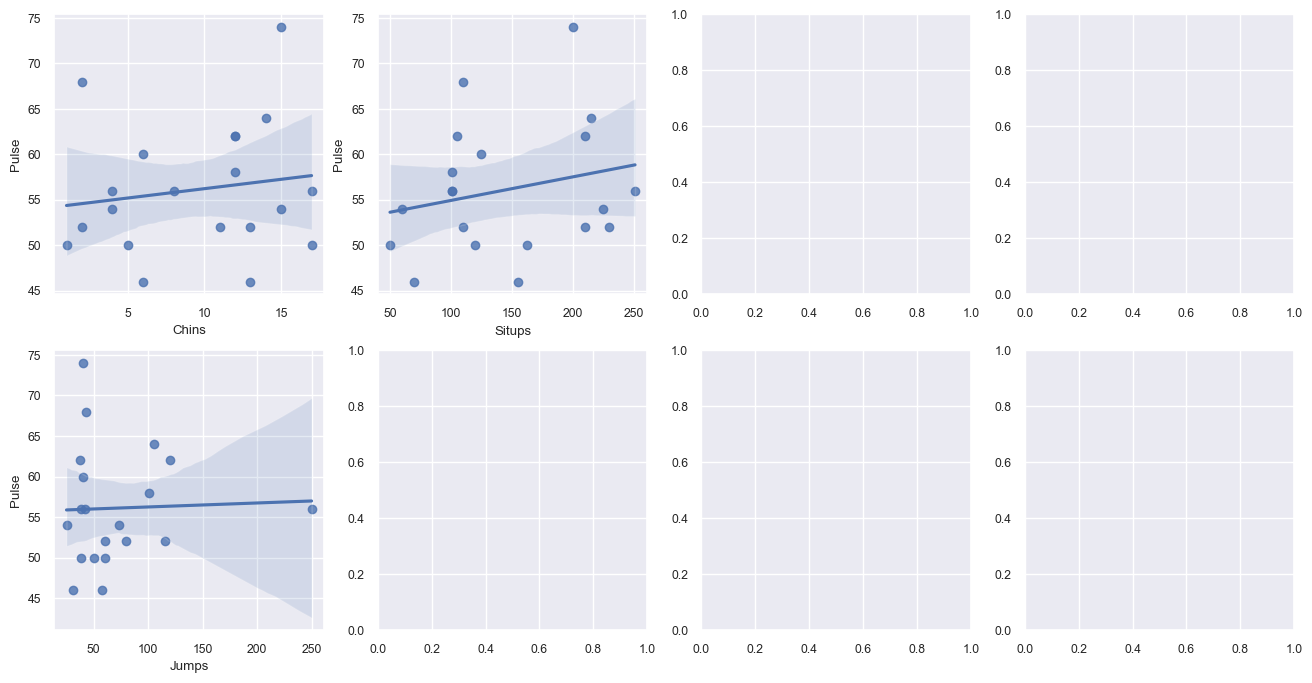

In [200]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['Chins','Situps','Jumps']

# i에는 인덱스가 feature에는 RM ~ RAD까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='Pulse', data=data, ax=axs[row][col])

In [201]:
df_corr = data.corr()

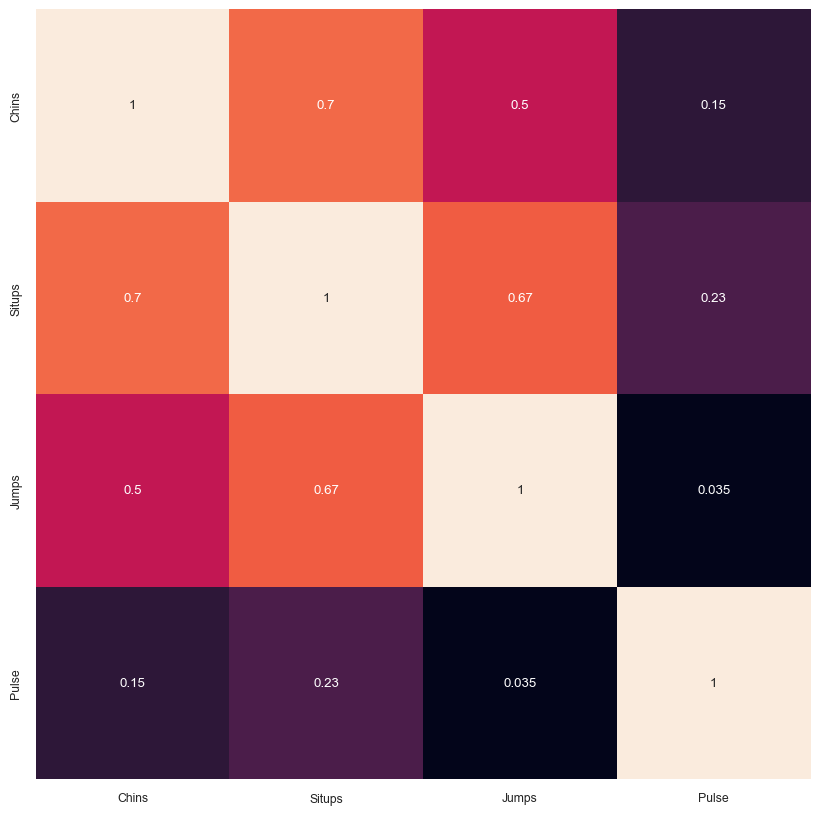

In [202]:
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [204]:
from sklearn.model_selection import train_test_split

x_data=data.loc[:, ['Situps', 'Chins','Jumps']]
y_data=data.loc[:, 'Pulse']
X_train, X_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16, 3) (16,)
(4, 3) (4,)


In [205]:
X_train.head()

,Situps,Chins,Jumps
14,70.0,6.0,31.0
16,60.0,4.0,25.0
10,120.0,17.0,38.0
8,200.0,15.0,40.0
5,101.0,4.0,42.0


In [206]:
y_train.head()

14    46.0
16    54.0
10    50.0
8     74.0
5     56.0
Name: Pulse, dtype: float64

In [207]:
lr = LinearRegression()

In [208]:
lr.fit(X_train, y_train)

LinearRegression()

In [209]:
print("회귀계수(기울기):", np.round(lr.coef_, 1)) #np: numpy, coef_: 피처에 대한 회귀 계수 값
print("상수항(절편):", np.round(lr.intercept_, 1))  #intercept_: 상수항(절편) 값

회귀계수(기울기): [ 0.   0.4 -0. ]
상수항(절편): 49.1


In [210]:
y_preds = lr.predict(X_test) #예측값
print(X_train.shape, X_test.shape)

(16, 3) (4, 3)


In [211]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 75.724, RMSE: 8.702
Variance score : -0.771


In [212]:
print("절편 값:", lr.intercept_) # y축 절편값

# 회귀 계수(coefficient) : 독립변수의 변화에 따라 종속변수에 미치는 영향력이 크기
print("회귀계수:", np.round(lr.coef_,1))

절편 값: 49.06436018104749
회귀계수: [ 0.   0.4 -0. ]


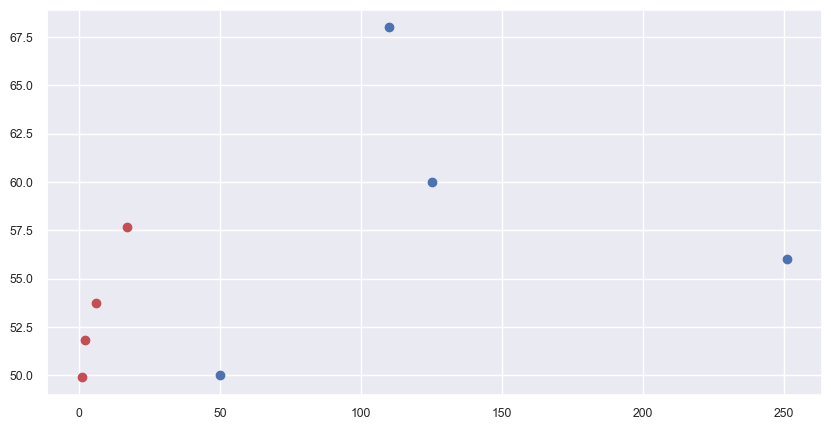

In [213]:
y_test_pred=lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Situps'], y_test, label='y_test')
plt.scatter(X_test['Chins'], y_test_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()           

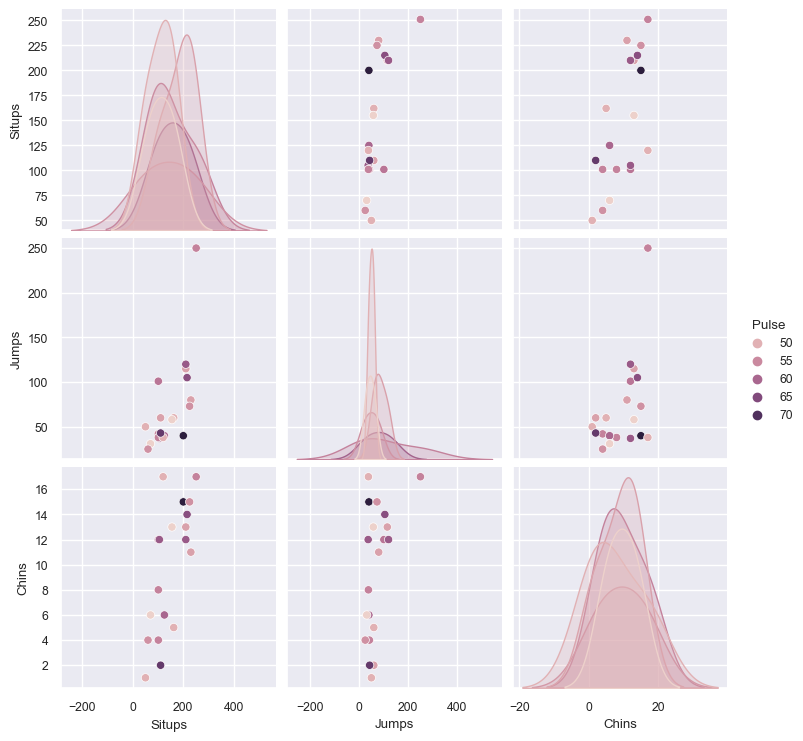

In [214]:
sns.pairplot(data,
             vars=['Situps','Jumps','Chins'],
            hue ='Pulse')
plt.show()

In [215]:
from sklearn.metrics import mean_absolute_error
y_prediction = lr.predict(X_test)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(y_test, y_prediction)
print(mae)

6.051117705814116


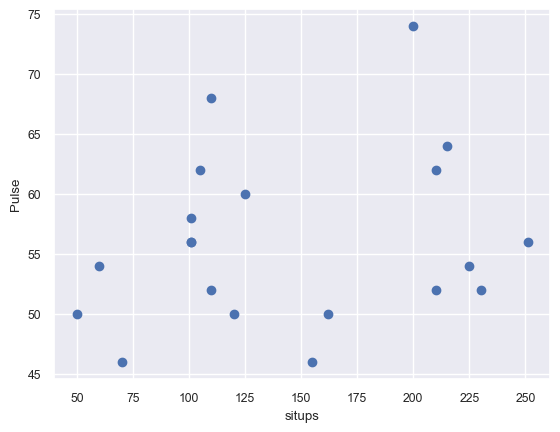

In [216]:
plt.scatter(data['Situps'], data['Pulse'])
plt.xlabel('situps')
plt.ylabel('Pulse')

plt.show()

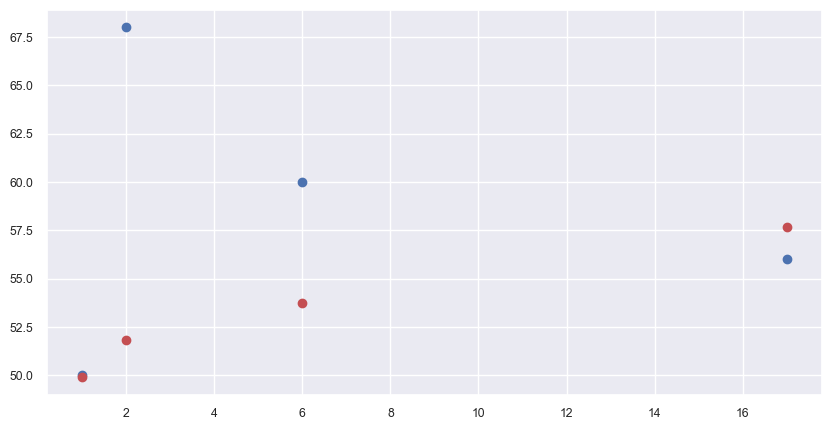

In [217]:
y_test_pred=lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Chins'], y_test, label='y_test')
plt.scatter(X_test['Chins'], y_test_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()     

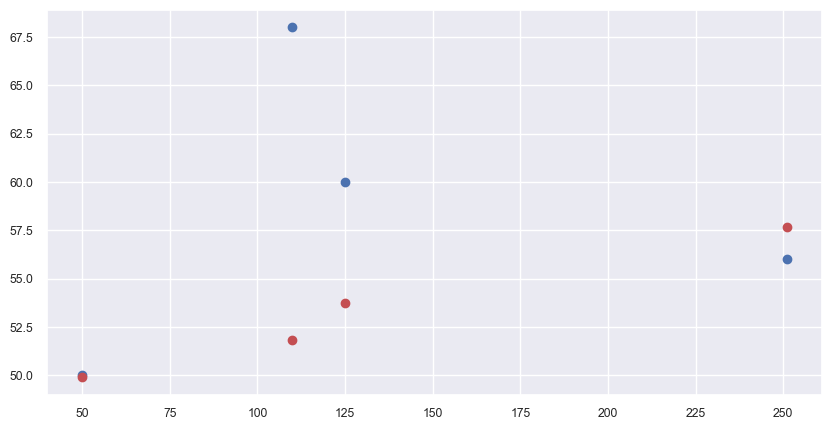

In [218]:
#예측값 저장
y_test_pred=lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Situps'], y_test, label='y_test')
plt.scatter(X_test['Situps'], y_test_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()   

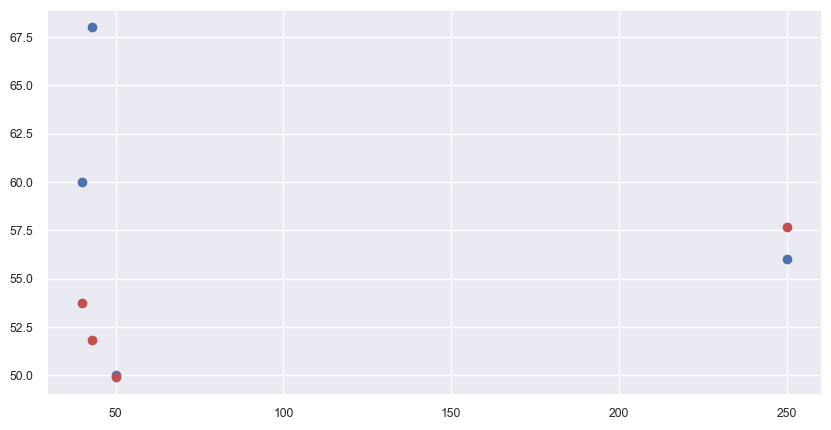

In [219]:
#예측값 저장
y_test_pred=lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Jumps'], y_test, label='y_test')
plt.scatter(X_test['Jumps'], y_test_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()  

# 스케일링

In [220]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
#Standard Scaling
std = StandardScaler()
std.fit(X_train)
X_train_std= std.transform(X_train)
X_test_std= std.transform(X_test)

C:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


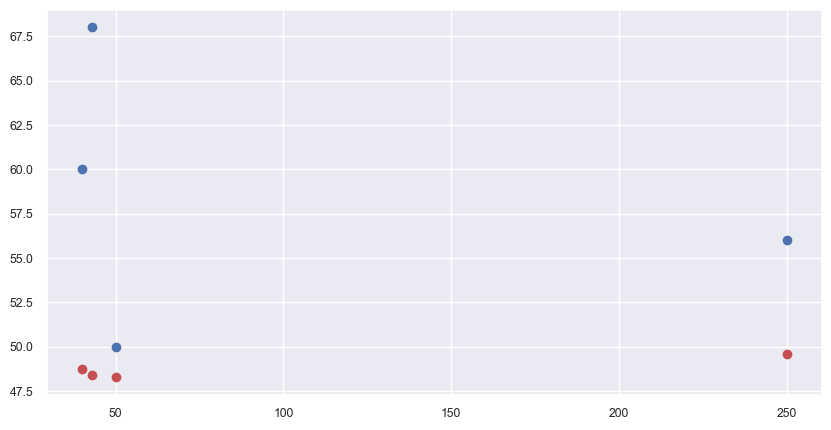

In [221]:
y_test_pred=lr.predict(X_test_std)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Jumps'], y_test, label='y_test')
plt.scatter(X_test['Jumps'], y_test_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()  

C:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


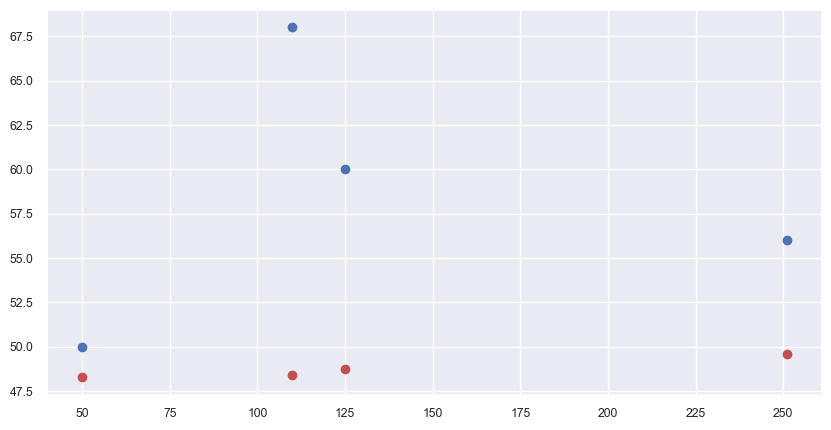

In [222]:
y_test_pred=lr.predict(X_test_std)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Situps'], y_test, label='y_test')
plt.scatter(X_test['Situps'], y_test_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()   

C:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


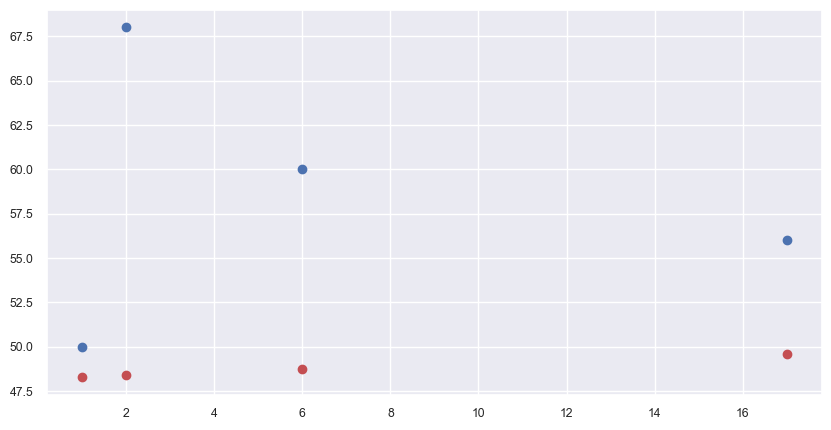

In [223]:
y_test_pred=lr.predict(X_test_std)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Chins'], y_test, label='y_test')
plt.scatter(X_test['Chins'], y_test_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()     

In [224]:
y_prediction = lr.predict(X_test_std)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(y_test, y_prediction)
print(mae)

9.759554865480188


C:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Ridge & Lasso

In [225]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [226]:
lr1 = LinearRegression().fit(X_train, y_train)
ridge_score = Ridge(alpha=0.1).fit(X_train, y_train)
lasso_score = Lasso(alpha=0.1).fit(X_train, y_train)

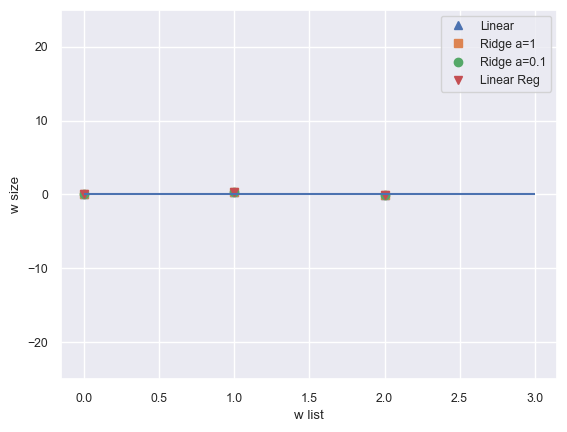

In [227]:
plt.plot(ridge_score.coef_,'^',label="Linear")
plt.plot(lr1.coef_,'s',label="Ridge a=1")
plt.plot(lasso_score.coef_,'o',label="Ridge a=0.1")

plt.plot(lr.coef_,'v',label="Linear Reg")
plt.xlabel("w list")
plt.ylabel("w size")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

In [228]:
ridge = Ridge(alpha = 10)
lasso = Lasso(alpha = 10)

In [229]:
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso(alpha=10)

In [235]:
ridge_y_pred = ridge.predict(X_test_std)
lasso_y_pred = lasso.predict(X_test)

C:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


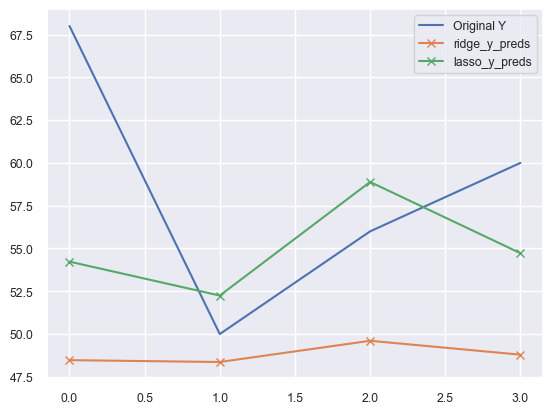

In [236]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(range(len(y_test)), y_test, '-', label="Original Y")
ax.plot(range(len(y_test)), ridge_y_pred, '-x', label="ridge_y_preds")
ax.plot(range(len(y_test)), lasso_y_pred, '-x', label="lasso_y_preds")

plt.legend(loc='upper right')
plt.show()

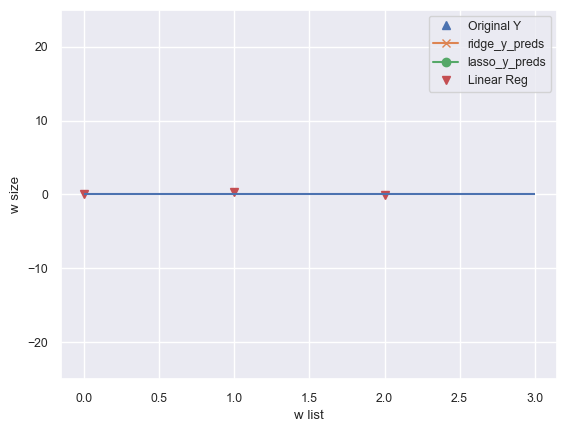

In [237]:
plt.plot(range(len(y_test)), y_test, '^', label="Original Y")
plt.plot(range(len(y_test)), ridge_y_pred, '-x', label="ridge_y_preds")
plt.plot(range(len(y_test)), lasso_y_pred, '-o', label="lasso_y_preds")

plt.plot(lr.coef_,'v',label="Linear Reg")
plt.xlabel("w list")
plt.ylabel("w size")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

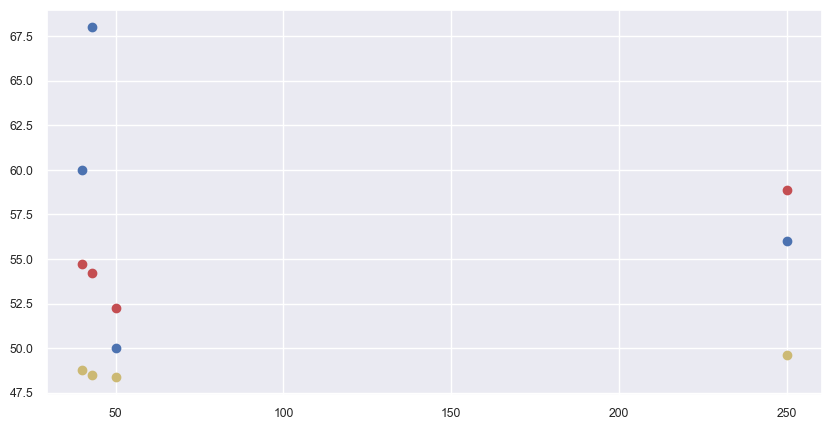

In [238]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Jumps'], y_test, c='b', label='y_test')
plt.scatter(X_test['Jumps'], lasso_y_pred, c='r', label='lasso_pred')
plt.scatter(X_test['Jumps'], ridge_y_pred, c='y', label='Ridge_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()  